<a href="https://colab.research.google.com/github/anuvarma10/Stock-Market-Trend-Prediction/blob/main/FLOORPLAN_WALL_DETECTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOUNTING TO DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**UNZIPPING THE DATASET**

In [ ]:
!unzip "/content/drive/MyDrive/Floorplanwalls.zip" -d "/content/floorplan_dataset"

Archive:  /content/drive/MyDrive/Floorplanwalls.zip
replace /content/floorplan_dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/floorplan_dataset/README.dataset.txt  
  inflating: /content/floorplan_dataset/README.roboflow.txt  
 extracting: /content/floorplan_dataset/test/1029_png.rf.bedd65f0ca26b7358653f9622f3408d5.jpg  
 extracting: /content/floorplan_dataset/test/1039_png.rf.ab3c786af64158e03413d9708f9b1398.jpg  
 extracting: /content/floorplan_dataset/test/107_png.rf.efd7eedd26cc3a39f71c42ac2b72090c.jpg  
 extracting: /content/floorplan_dataset/test/1089_png.rf.bc196e5bb253094a8c88f35f22b9c0d6.jpg  
 extracting: /content/floorplan_dataset/test/110_jpg.rf.99408a2e04cb062e709b1ca0e79496a4.jpg  
 extracting: /content/floorplan_dataset/test/1148_png.rf.c25268a75bc185bc0774573936b99d0c.jpg  
 extracting: /content/floorplan_dataset/test/1168_png.rf.be062f28659722d8cb45f847bca84966.jpg  
 extracting: /content/floorplan_dataset/test/1169_png.rf.a28

**VISUALIZING ANNOTATIONS FROM TRAIN, TEST, VALID SETS**

In [ ]:
!pip install pycocotools

In [ ]:
from pycocotools.coco import COCO

annotation_path = "/content/floorplan_dataset/train/_annotations.coco.json"
coco = COCO(annotation_path)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!


In [ ]:
from pycocotools.coco import COCO

annotation_path = "/content/floorplan_dataset/test/_annotations.coco.json"
coco = COCO(annotation_path)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [ ]:
from pycocotools.coco import COCO

annotation_path = "/content/floorplan_dataset/valid/_annotations.coco.json"
coco = COCO(annotation_path)

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


loading annotations into memory...
Done (t=2.35s)
creating index...
index created!


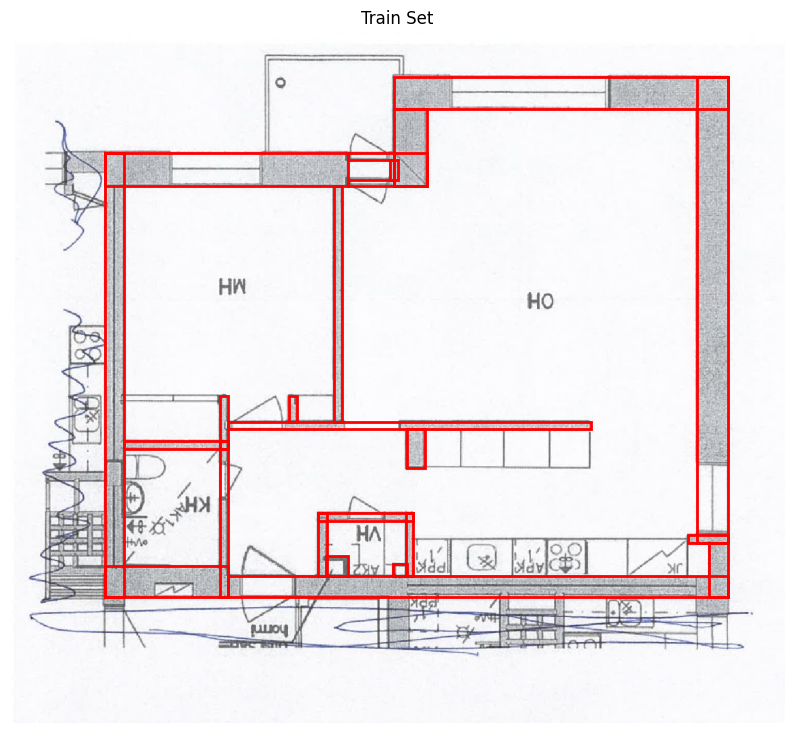

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


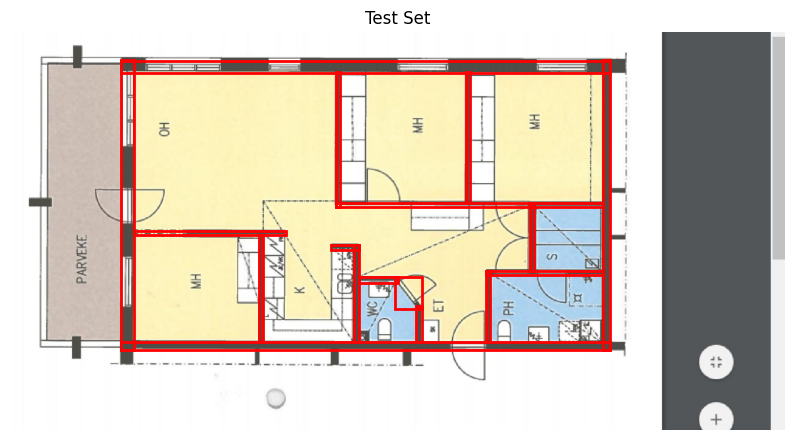

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


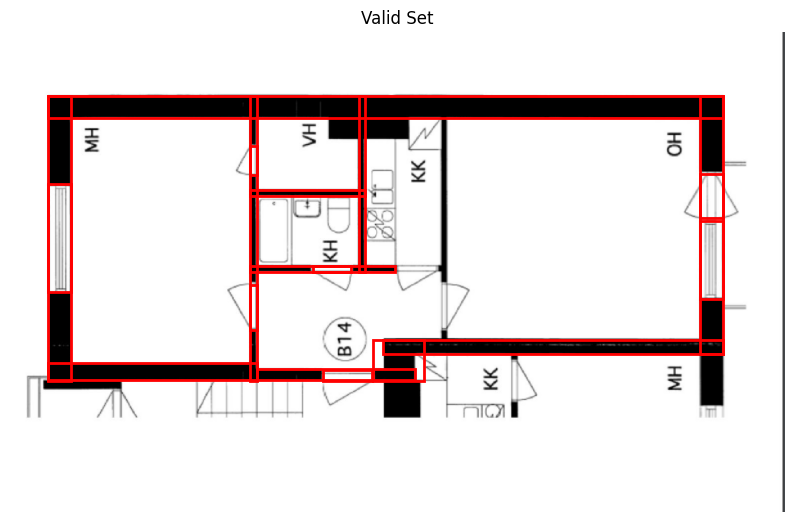

In [ ]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def visualize_annotations(annotation_path, image_dir, title="Annotation Preview"):
    coco = COCO(annotation_path)
    img_ids = coco.getImgIds()
    img_id = random.choice(img_ids)
    img_info = coco.loadImgs(img_id)[0]

    img_path = f"{image_dir}/{img_info['file_name']}"
    image = Image.open(img_path).convert("RGB")

    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    ax = plt.gca()

    for ann in anns:
        bbox = ann['bbox']
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# 🔍 Visualize each split
visualize_annotations(
    "/content/floorplan_dataset/train/_annotations.coco.json",
    "/content/floorplan_dataset/train",
    title="Train Set"
)

visualize_annotations(
    "/content/floorplan_dataset/test/_annotations.coco.json",
    "/content/floorplan_dataset/test",
    title="Test Set"
)

visualize_annotations(
    "/content/floorplan_dataset/valid/_annotations.coco.json",
    "/content/floorplan_dataset/valid",
    title="Valid Set"
)

**INSTALLING REQUIREMENTS**

**INSTALLING DETECTRON 2**

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ogpniuom
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ogpniuom
  Resolved https://github.com/facebookresearch/detectron2.git to commit a1ce2f956a1d2212ad672e3c47d53405c2fe4312
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
!pip uninstall Pillow -y
!pip install Pillow==9.5.0

Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Successfully uninstalled Pillow-9.5.0
  Using cached Pillow-9.5.0-cp312-cp312-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


FIXING ANNOTATIONS ATTRIBUTES IN DATASET

In [ ]:
import json

# Paths to all annotation files
annotation_files = [
    "/content/floorplan_dataset/train/_annotations.coco.json",
    "/content/floorplan_dataset/valid/_annotations.coco.json",
    "/content/floorplan_dataset/test/_annotations.coco.json"
]

# Loop over all annotation files
for file_path in annotation_files:
    with open(file_path, "r") as f:
        data = json.load(f)

    # Fix in categories
    for category in data["categories"]:
        if category["name"] == "walls":
            category["name"] = "wall"

    # Fix in annotations (if category_id refers to old label)
    for ann in data["annotations"]:
        cat_id = ann["category_id"]
        if data["categories"][cat_id-1]["name"] == "wall":
            ann["category_id"] = data["categories"][cat_id-1]["id"]

    # Save updated file
    with open(file_path, "w") as f:
        json.dump(data, f, indent=2)

print("✅ Fixed 'walls' → 'wall' in train, valid, and test annotations!")

✅ Fixed 'walls' → 'wall' in train, valid, and test annotations!


**REGISTERING DATASETS**

In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("floorplan_train", {},
    "/content/floorplan_dataset/train/_annotations.coco.json",
    "/content/floorplan_dataset/train")

register_coco_instances("floorplan_valid", {},
    "/content/floorplan_dataset/valid/_annotations.coco.json",
    "/content/floorplan_dataset/valid")

register_coco_instances("floorplan_test", {},
    "/content/floorplan_dataset/test/_annotations.coco.json",
    "/content/floorplan_dataset/test")

**CONFIGURING THE FASTER R-CNN MODEL**

In [ ]:
# Create configs folder
!mkdir -p configs/COCO-Detection

# Download Faster R-CNN config
!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml -P configs/COCO-Detection/

--2025-09-04 17:45:53--  https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193 [text/plain]
Saving to: ‘configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml.2’

faster_rcnn_R_50_FP 100%[===================>]     193  --.-KB/s    in 0s      

2025-09-04 17:45:54 (2.96 MB/s) - ‘configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml.2’ saved [193/193]



In [ ]:
import torch

# Download Faster R-CNN weights from Torchvision
torch.hub.download_url_to_file(
    'https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth',
    'fasterrcnn_resnet50_fpn_coco.pth'
)

100%|██████████| 160M/160M [00:00<00:00, 301MB/s]


In [ ]:
!mkdir -p configs
!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/Base-RCNN-FPN.yaml -P configs/

--2025-09-04 17:45:59--  https://raw.githubusercontent.com/facebookresearch/detectron2/main/configs/Base-RCNN-FPN.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318 (1.3K) [text/plain]
Saving to: ‘configs/Base-RCNN-FPN.yaml.2’

Base-RCNN-FPN.yaml. 100%[===================>]   1.29K  --.-KB/s    in 0s      

2025-09-04 17:45:59 (48.1 MB/s) - ‘configs/Base-RCNN-FPN.yaml.2’ saved [1318/1318]



**MODEL TRAINING**

In [ ]:
from detectron2.engine import DefaultTrainer
import os
from detectron2.config import get_cfg # Import get_cfg
from detectron2 import model_zoo # Import model_zoo

# Initialize a default Detectron2 config
cfg = get_cfg()

# Load the Faster R-CNN config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# Training config
cfg.DATASETS.TRAIN = ("floorplan_train",)
cfg.DATASETS.TEST = ("floorplan_valid",) # Set the test dataset to floorplan_valid
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3
cfg.SOLVER.CHECKPOINT_PERIOD = 200
cfg.OUTPUT_DIR = "/content/drive/MyDrive/wall_frcnn"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.DEVICE = "cpu"

# ✅ Resume from last checkpoint if available
last_ckpt_path = os.path.join(cfg.OUTPUT_DIR, "last_checkpoint")
if os.path.exists(last_ckpt_path):
    with open(last_ckpt_path, "r") as f:
        last_ckpt = f.read().strip()
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, last_ckpt)
    cfg.resume = True
else:
    print("⚠️ No checkpoint found — starting fresh.")
    cfg.resume = False

# Explicitly set the path to the downloaded pre-trained weights
cfg.MODEL.WEIGHTS = "./fasterrcnn_resnet50_fpn_coco.pth"

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

In [ ]:
from detectron2.data import MetadataCatalog

**BATCH INFERENCE ON VALIDATION SET**

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Directory paths
input_dir = "/content/floorplan_dataset/valid"  # Folder with validation images
output_dir = "/content/inference_results"
os.makedirs(output_dir, exist_ok=True)

# Metadata
metadata = MetadataCatalog.get("floorplan_valid")

# Loop through images for batch inference
for img_name in os.listdir(input_dir):
    if img_name.endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(input_dir, img_name)
        im = cv2.imread(img_path)

        # Run inference
        outputs = predictor(im)
        instances = outputs["instances"].to("cpu")

        # ✅ Filter predictions by confidence (only > 0.7)
        high_conf_preds = instances[instances.scores > 0.7]

        # Visualization
        v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1.0)
        out = v.draw_instance_predictions(high_conf_preds)

        # Save output
        save_path = os.path.join(output_dir, img_name)
        cv2.imwrite(save_path, out.get_image()[:, :, ::-1])

print(f"✅ Inference completed! Results saved in: {output_dir}")

✅ Inference completed! Results saved in: /content/inference_results


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Create evaluator for validation dataset
evaluator = COCOEvaluator("floorplan_valid", cfg, False, output_dir="./output_fasterrcnn/")

# Build test loader
val_loader = build_detection_test_loader(cfg, "floorplan_valid")

# Run evaluation
print("Evaluating model performance on validation set...")
metrics = inference_on_dataset(trainer.model, val_loader, evaluator)

print("\n✅ Evaluation Metrics:")
print(metrics)

NameError: name 'cfg' is not defined